In [67]:
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
import face_recognition

In [70]:
def face_dist(allvecs, vec1):
    return np.linalg.norm((allvecs-vec1).astype(np.float64),axis=1)
def face_distto1(allvecs, vec1):
    return np.linalg.norm((allvecs-vec1).astype(np.float64))

In [71]:
embvecs = pd.read_csv('face_recognizer_encodings.csv')
dataset = pd.read_csv('likes.csv')
df_res = embvecs['image_name'].copy()
imagemap = {}
for index, row in tqdm(embvecs.iterrows()):
    vector = row.values[1:]
    name = row.values[0]
    imagemap[name] = vector

32817it [00:01, 24833.81it/s]


In [73]:
l_dataset = dataset[dataset['target'] == 1]
d_dataset = dataset[dataset['target'] == 0]
print(l_dataset.shape[0],dataset.shape[0])

24 195


In [4]:
X_train = []
for i in tqdm(range(l_dataset.shape[0])):
    if l_dataset['image_name'].iloc[i] in imagemap:
        X_train.append(imagemap[l_dataset['image_name'].iloc[i]])
X_train = np.array(X_train)
X_train.shape

100%|█████████████████████████████████████████████████████████████████████████████| 126/126 [00:00<00:00, 18056.66it/s]


(85, 128)

In [5]:
D_train = []
for i in tqdm(range(d_dataset.shape[0])):
    if d_dataset['image_name'].iloc[i] in imagemap:
        D_train.append(imagemap[d_dataset['image_name'].iloc[i]])
D_train = np.array(D_train)
D_train.shape

100%|█████████████████████████████████████████████████████████████████████████████| 984/984 [00:00<00:00, 44852.53it/s]


(701, 128)

In [17]:
result = 0
for i in tqdm(range(X_train.shape[0])):
    row = X_train[i]
    subsum = 0
    for j in range(i+1, X_train.shape[0]):
        subsum += face_distto1(X_train[j], row)/(X_train.shape[0]-i-1)
    result += subsum/(X_train.shape[0])
print(result)

100%|████████████████████████████████████████████████████████████████████████████████| 85/85 [00:00<00:00, 1704.55it/s]


0.692127093353283


In [16]:
result = 0
for i in tqdm(range(D_train.shape[0])):
    row = D_train[i]
    subsum = 0
    for j in range(i+1, D_train.shape[0]):
        subsum += face_distto1(D_train[j], row)/(D_train.shape[0]-i-1)
    result += subsum/(D_train.shape[0])
print(result)

100%|███████████████████████████████████████████████████████████████████████████████| 701/701 [00:03<00:00, 198.05it/s]


0.7613356211885209


In [19]:
result = 0
for i in tqdm(range(D_train.shape[0])):
    row = D_train[i]
    subsum = 0
    for j in range(X_train.shape[0]):
        subsum += face_distto1(X_train[j], row)/(X_train.shape[0])
    result += subsum/(D_train.shape[0])
print(result)

100%|███████████████████████████████████████████████████████████████████████████████| 701/701 [00:00<00:00, 869.90it/s]


0.7432775565012666


In [21]:
dist = np.zeros(embvecs.shape[0])
for i in tqdm(range(X_train.shape[0])):
    vec1 = X_train[i]
    dist += face_dist(embvecs.values[:,1:], vec1)
dist

100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [00:21<00:00,  3.95it/s]


array([63.97448693, 60.72072322, 58.76539747, ..., 61.07730448,
       73.54160213, 68.26002174])

In [27]:
df = pd.DataFrame({'image_name':embvecs.values[:,0],'dist':dist})
df = df.sort_values(by = ['dist'])

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_digits(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    
    plt.figure(figsize=(4*n, 4*len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

In [32]:
images = []
for i in range(10):
    file = df['image_name'].iloc[i]
    img = cv2.imread('Selfie-dataset/images/'+file+'.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
images = np.array(images)

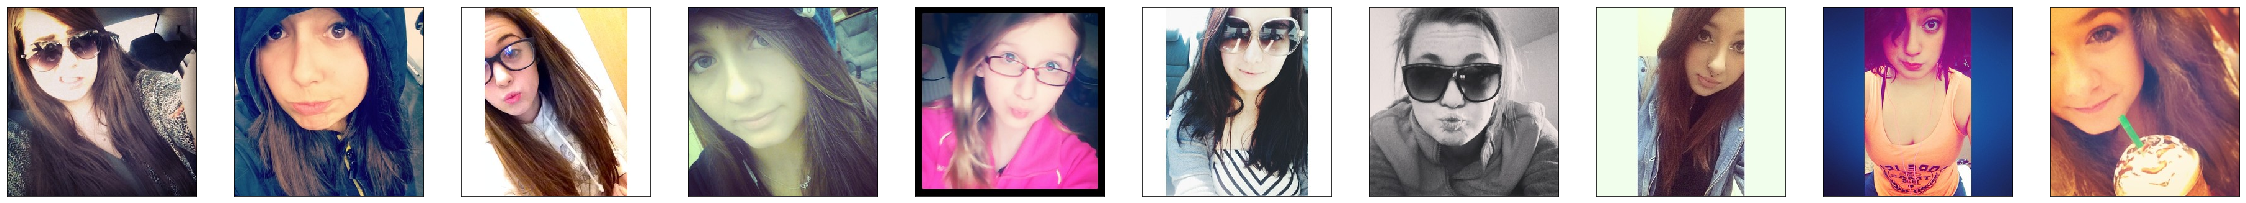

In [33]:
plot_digits(images)

In [31]:
res = 0
for i in range(l_dataset.shape[0]):
    if l_dataset['image_name'].iloc[i] in imagemap:
        vec = imagemap[l_dataset['image_name'].iloc[i]]
        if vec[-11]==0:
            res += 1
res

0

In [10]:
imagemap[l_dataset['image_name'].iloc[0]]

array([-0.020135807, 0.05696651, 0.07527028, -0.041816384, -0.057269484,
       -0.017622419, 0.033733077, 0.011645393, 0.089706041, 0.007123549,
       0.017088918, 0.047416735, -0.047412403, -0.032886583, 0.020127021,
       -0.08796762699999999, 0.015879847, 0.000517113, 0.059252907,
       -0.008206679, 0.011296419, -0.082896367, 0.072657362, -0.023070801,
       0.041587919, 0.019133942, -0.038954109, -0.032440629,
       0.006191988000000001, 0.04226087, 0.025003407, -0.010186057,
       -0.07307747, -0.043765146, -0.095679745, -0.054514609000000006,
       -0.06997305200000001, -0.059591737, 0.0066791540000000005,
       -0.08512525300000001, 0.010632101, 0.025475606, 0.061393298,
       -0.05895815400000001, -0.029555606, -6.230000000000001e-08,
       -0.097703755, 0.014429891, -0.04791135, 0.051369879000000014,
       -0.029084604, -0.009945974, -0.023222949, 0.027912371, 0.023132872,
       -0.027297541, -0.077352718, -0.036228213, 0.004876548, 0.012990759,
       0.05320832

In [18]:
imagemap[l_dataset['image_name'].iloc[3]]

array([-0.012674768, 0.051873364000000005, 0.046953693, -0.005917314,
       -0.028357247, 0.013296226, -0.022768166, -0.012137084,
       -0.005000219, -0.07643427700000001, -0.010924016000000002,
       -0.044015992, 0.036211286, -1.17e-05, 0.075012967, -0.022374693,
       -0.013146505, -0.005403054, 0.014208608, 0.025365202000000003,
       -0.025324455, 0.028717138, -0.039514657, -0.035986673,
       -0.009617393, -0.074631765, 0.016419241, -0.077753142,
       -0.002585255, 0.013521614, 0.06039818, 0.007131482, 0.048237462,
       -0.059269637, -0.031428057999999995, -0.00385676, -0.039497778,
       0.099725477, -0.046124235, -0.089588784, -0.036797013, -0.05486691,
       0.085556626, -0.035021394, 0.029787391, 0.028753573, 0.020565152,
       0.056062132, 0.018227452, -0.028248902000000006, -0.075720862,
       0.047508597, 0.034185316, -0.009123808, 0.033478476,
       0.028386222000000006, -0.050406989000000006, -0.026872259,
       0.068928771, -0.047694594000000014, 0.0184

In [156]:
name = '10175269_565535766879093_820620744_a'
vec1 = embvecs[embvecs['image_name']==name].iloc[0].values[1:]

In [157]:
mindist = 10
maxdist = 0
minvec_name = ''
maxvec_name = ''
for i in tqdm(range(embvecs.shape[0])):
    vec2 = embvecs.iloc[i].values[1:]
    dist = np.linalg.norm(vec1-vec2)
    if (dist<mindist) and (embvecs['image_name'].iloc[i] != name):
        minvec_name = embvecs['image_name'].iloc[i]
        mindist = dist
    if (dist>maxdist) and (embvecs['image_name'].iloc[i] != name):
        maxvec_name = embvecs['image_name'].iloc[i]
        maxdist = dist

100%|██████████████████████████████████████████████████████████████████████████| 32817/32817 [00:06<00:00, 5455.94it/s]


In [158]:
imgs = [name,minvec_name,maxvec_name]

In [159]:
images = []
for file in imgs:
    img = cv2.imread('Selfie-dataset/faces/'+file+'.jpg')
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
images = np.array(images)

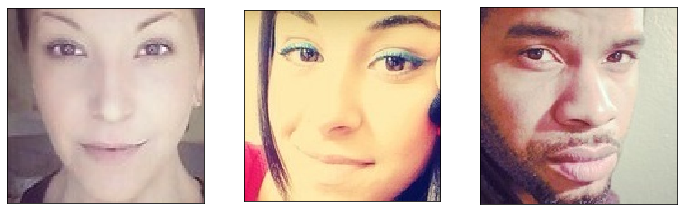

0.5084256718769657 1.0775247059152895


In [160]:
plot_digits(images)
print(mindist,maxdist)

In [103]:
vec2 = (embvecs.values)[:,1:]
res = vec2 - vec1
res

array([[0.048528887, 0.018863037, 0.008242707, ..., 0, -1, 0],
       [-0.070822895, 0.056158524, -0.058572087, ..., 0, -1, 0],
       [-0.014330905000000001, 0.048763335, 0.057137393, ..., 0, -1, 0],
       ...,
       [-0.10688494100000001, 0.002550004, -0.018609684, ..., 0, -1, 0],
       [-0.020344511000000003, -0.025926322, -0.013340805, ..., 0, -1, 0],
       [0.058879733, 0.03906035, 0.106198285, ..., 0, -1, 0]],
      dtype=object)

In [104]:
%%time
np.linalg.norm(res.astype(np.float64),axis=1).shape

Wall time: 173 ms


(37125,)